In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyfonts import load_bunny_font
import matplotlib.image as mpimg

In [2]:
sechselaeuten = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-12-02/sechselaeuten.csv')

In [3]:
sechselaeuten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      67 non-null     int64  
 1   duration  65 non-null     float64
 2   tre200m0  67 non-null     float64
 3   tre200mn  67 non-null     float64
 4   tre200mx  67 non-null     float64
 5   sre000m0  67 non-null     float64
 6   sremaxmv  67 non-null     float64
 7   rre150m0  67 non-null     float64
 8   record    67 non-null     bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 4.4 KB


In [4]:
sechselaeuten.head(2)

,year,duration,tre200m0,tre200mn,tre200mx,sre000m0,sremaxmv,rre150m0,record
0,1923,60.0,16.67,7.03,32.47,247.43,56.33,73.97,False
1,1952,6.0,18.73,9.10,33.70,269.70,61.67,93.67,False


In [5]:
# Additional data from Wikipedia and zuerich.com
data = {"year":[1923, 1993, 1994, 2003, 2006, 2008, 2017, 2019, 2020, 2021, 2024],
        "text":[
            "Böögg didn’t burn as\nit rained too much", 
            "The Böögg fell off\nthe pyre before\nits head had\nexploded.",
            "The Böögg fell off\nthe pyre before\nits head had\nexploded.",
            "5.70 minutes until the\nBöögg's head exploded\nand the summer average\ntopped 19°C.",
            "The Böögg was\nabducted twice.",
            "Heavy rains soaked\nthe Böögg that\nfiremen had to\nspray the pyre\nwith kerosene.",
            "9.93 min\nto explosion,\nsummer avg\ntopped 19°C.",
            "17.13 minutes elapsed\nuntil the Böögg's head\nexploded and the summer\naverage topped 19°C.",            
            "The Sechseläuten had\nto be cancelled due to\nthe coronavirus pandemic.",
            "With Covid-19 still raging,\nthe Böögg was burned\noutside Zürich in the\ncanton of Uri.",
            "The Böögg was cancelled\nin April because of strong\nwinds and took place only\non 22 June."
        ]}

text_df = pd.DataFrame(data)

In [6]:
# Merge df and additional data
df = pd.merge(sechselaeuten, text_df, on="year", how="left")

In [7]:
# Select relevant columns
df = df[["year", "duration", "text"]]

In [8]:
# Additional data from Wikipedia and zuerich.com
add_data = {"year":[1941, 1942, 1943, 1944, 1950, 1960, 1968, 1971],
            "duration": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
            "text":[                
                "The field was used to\nplant corn, no Böögg\nwas burned.",
                "The field was used to\nplant potatoes, no\nBöögg was burned.",
                "The field was used to\nplant wheat.",
                "The Böögg fell into\nLake Zurich.",
                "The Böögg fell off the pyre\nbefore its head had exploded.",
                "The Böögg fell off the pyre\nbefore its head had exploded.",
                "5 minutes to explosion,\nbut summer fell short.",
                "5 minutes to explosion,\nbut summer was a letdown."
             ]}

text_df2 = pd.DataFrame(add_data)

In [9]:
# Concatenate df and 2nd additional data
df = pd.concat([df, text_df2], ignore_index=True)

In [10]:
# Replace Nan values with 0, encode text column to either 0 or 1
df["text"] = df["text"].fillna(0)
df["text_encoded"] = df["text"].apply(lambda x: 1 if isinstance(x, str) else 0)

In [11]:
# Repeats a pattern of values to match the length of df
levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(df) / 6)))[:len(df)]  

# Assign levels, if text encoded is 0 skip
df["level"] = df.apply(lambda row: 0 if row["text_encoded"] == 0 else levels[row.name], axis=1)

In [12]:
# Load font
font = load_bunny_font("Alata")

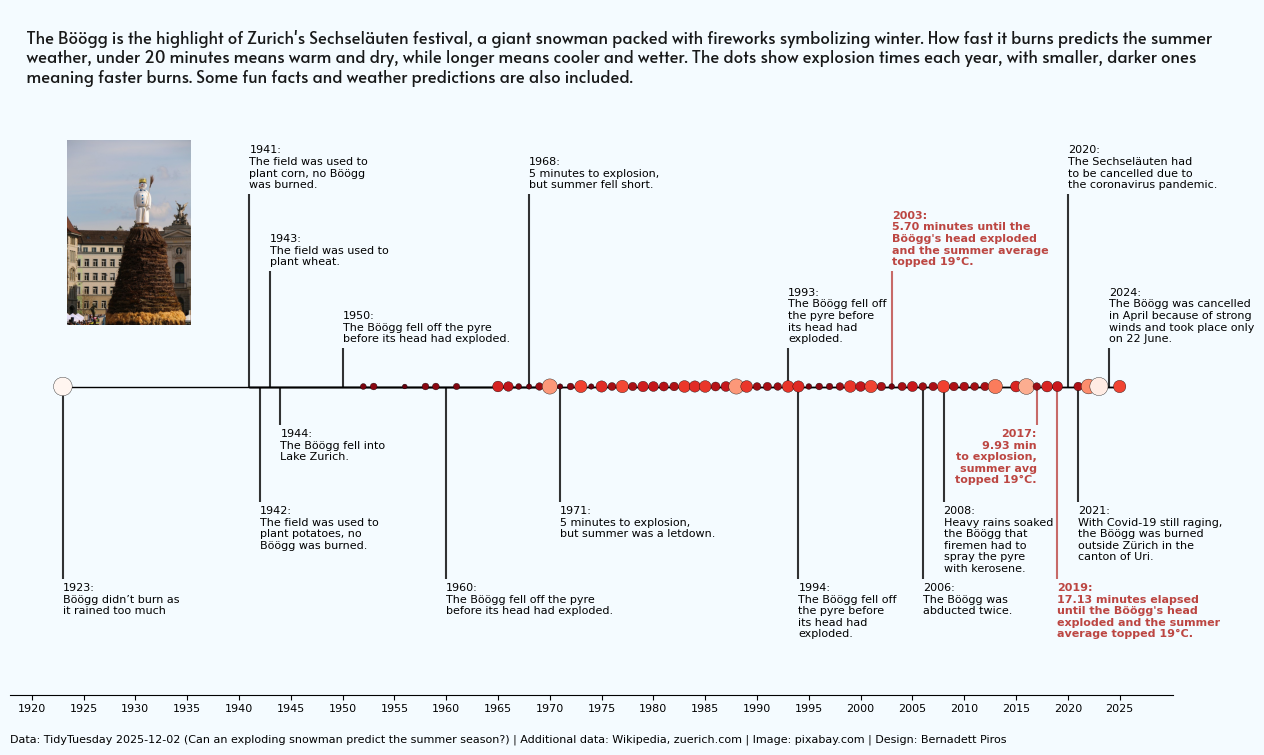

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))

# Scatter
ax.scatter(df["year"], np.zeros_like(df["year"]), 
           s=df["duration"]*3,  
           c=df["duration"],  
           cmap="Reds_r",  
           edgecolor="black",  
           lw=0.25,
           alpha=1)  

# Line to connect scatters
ax.plot(df["year"], np.zeros_like(df["year"]), color="black", lw=1, zorder=-1)

# Add vertical lines and text annotation
subset = df[df["text_encoded"] == 1]

for i, row in subset.iterrows():
    color = "#BC4642" if row["year"] in [2003, 2017, 2019] else "black"    
    weight = "bold" if row["year"] in [2003, 2017, 2019] else "regular"
    offset = 0.1 if row["level"] > 0 else -0.1
    ha = "right" if row["year"] == 2017 else "left"
    va = "bottom" if row["level"] > 0 else "top"
    ax.vlines(row["year"], 0, row["level"], color=color, alpha=0.8, zorder=-1)    
    ax.text(row["year"], row["level"] + offset, s=f'{row["year"]}:\n{row["text"]}', color=color, weight=weight, fontsize=8, ha=ha, va=va)    
    
# x axis tick labels
ax.set_xticks(range(1920, 2030, 5))

# x axis tick label size
ax.tick_params(
  axis="x",
  labelsize=8  
)

# Set y limit
ax.set_ylim(-8, 8)

# Remove y ticks and spines
ax.set_yticks([])
ax.spines[["left", "top", "right"]].set_visible(False)

# Background color
ax.set_facecolor("#F4FBFF")
fig.set_facecolor("#F4FBFF")

# Add image
img_crane = mpimg.imread("tradition-721543_640.jpg") 
child_ax = ax.inset_axes([0.002, 0.6, 0.2, 0.3])
child_ax.imshow(img_crane)
child_ax.axis("off")

# Title
txt = '''
    The Böögg is the highlight of Zurich's Sechseläuten festival, a giant snowman packed with fireworks symbolizing winter. How fast it burns predicts the summer
    weather, under 20 minutes means warm and dry, while longer means cooler and wetter. The dots show explosion times each year, with smaller, darker ones
    meaning faster burns. Some fun facts and weather predictions are also included.
    '''

fig.text(0.125, 0.85, s=txt, alpha=0.9, size=12, font=font)

# Caption
fig.text(0.125, 0.05, "Data: TidyTuesday 2025-12-02 (Can an exploding snowman predict the summer season?) | Additional data: Wikipedia, zuerich.com | Image: pixabay.com | Design: Bernadett Piros", size=8)

plt.show()

#fig.savefig("2025-12-02.png", bbox_inches="tight", pad_inches=0.2)